# Build Graphs

In this notebook we build graphs from the raw data.

In [1]:
from gnn_tracking.utils.plotting import EventPlotter
from gnn_tracking.graph_construction.graph_builder import GraphBuilder
from gnn_tracking.preprocessing.point_cloud_builder import PointCloudBuilder
from gnn_tracking.utils.plotting import PointCloudPlotter
from pathlib import Path

In [2]:
data_path = Path.home() / "ws/CERN/gnn-tracking/data" 
# Unprocessed data should live here
input_dir = data_path / "train_1"
print (input_dir)
assert data_path.is_dir()

/homes/zque/ws/CERN/gnn-tracking/data/train_1


In [3]:
# The event id that you use for these examples
evtid = 2808
# If the following statement doesn't pass, maybe you need a different
# evtid

print (input_dir / f"event{evtid:09}-cells.csv")

assert (input_dir / f"event{evtid:09}-cells.csv").is_file()

/homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002808-cells.csv


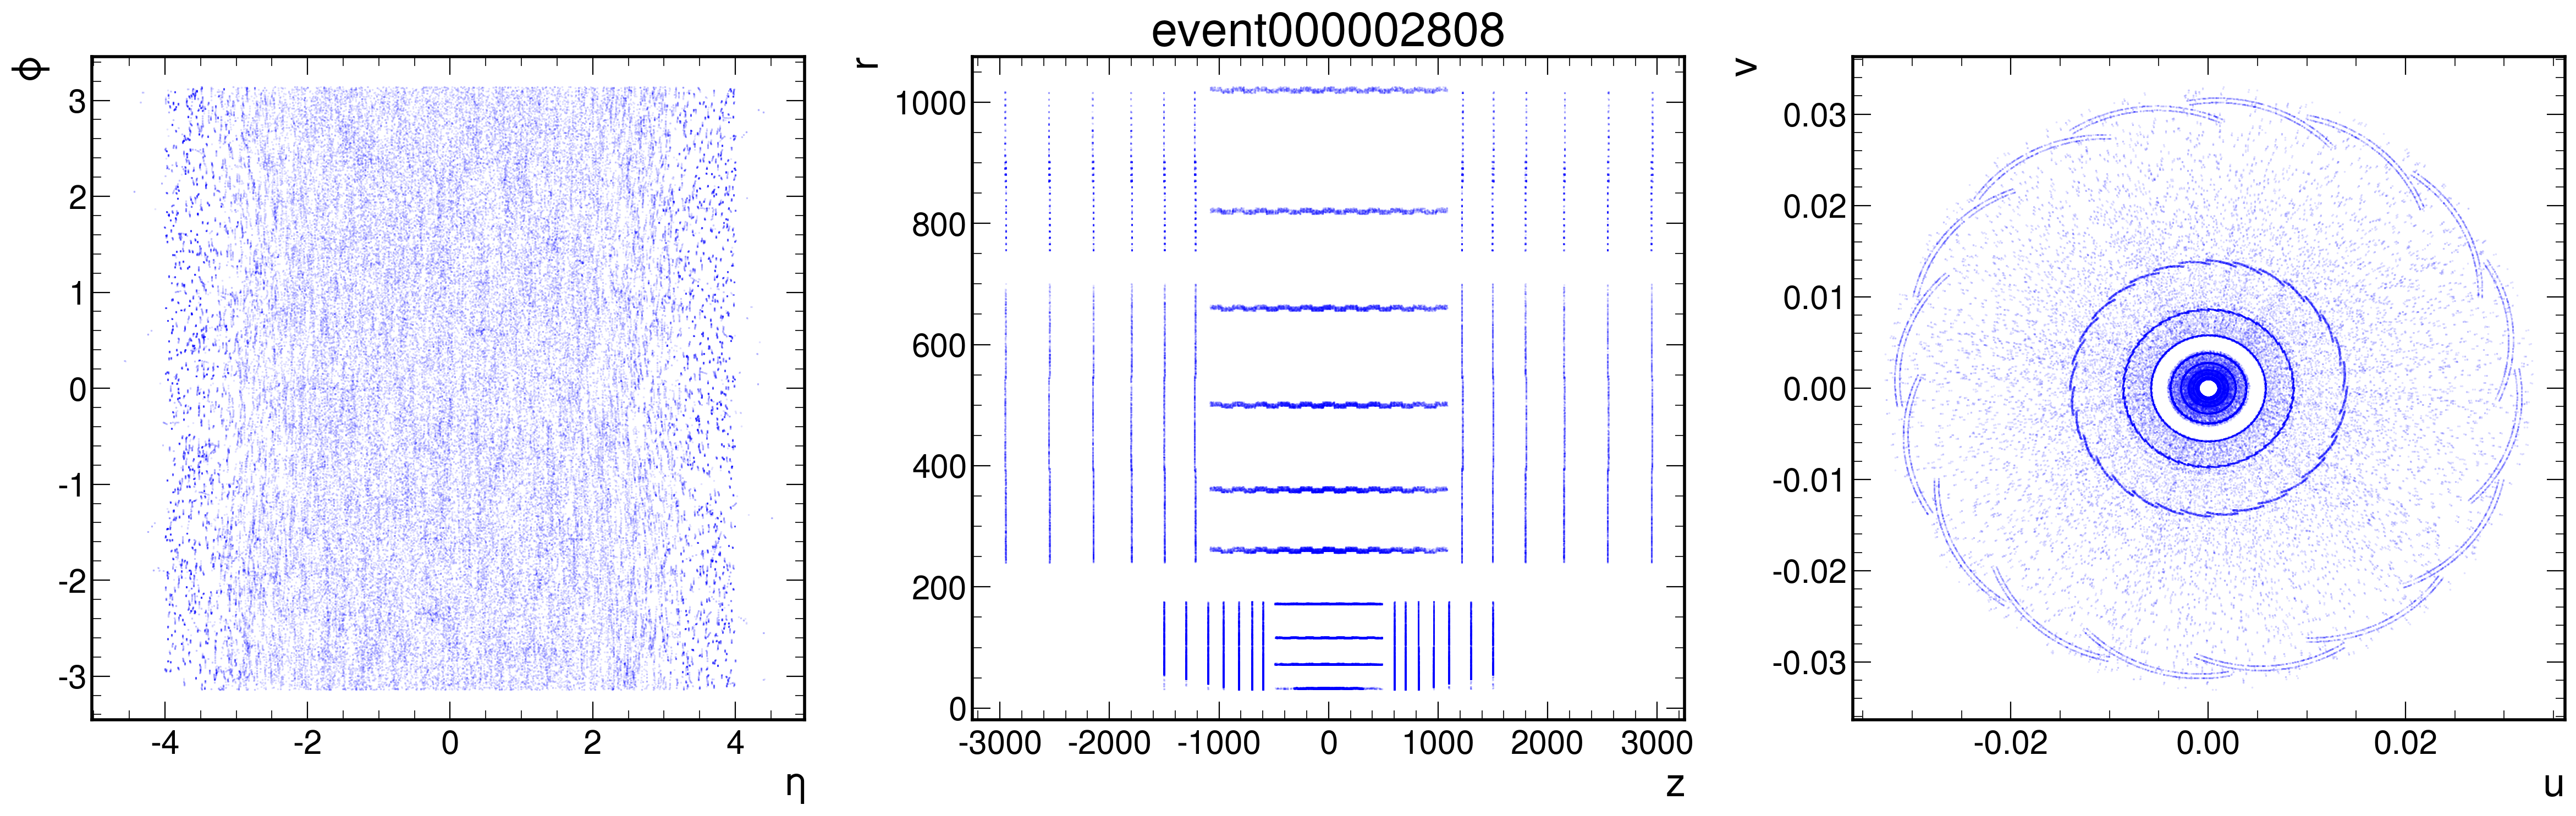

(<Figure size 4800x1600 with 3 Axes>,
 array([<Axes: xlabel='$\\eta$', ylabel='$\\phi$'>,
        <Axes: title={'center': 'event000002808'}, xlabel='$z$', ylabel='$r$'>,
        <Axes: xlabel='u', ylabel='v'>], dtype=object))

In [4]:
# The input directory should contain the trackml dataset
event_plotter = EventPlotter(indir=input_dir)
event_plotter.plot_ep_rv_uv(evtid=evtid)

In [6]:
# build point clouds for each sector in the pixel layers only
pc_builder = PointCloudBuilder(
    indir=input_dir,
    outdir=data_path / "point_clouds",
    n_sectors=32,
    pixel_only=True,
    redo=False,
    measurement_mode=False,
    sector_di=0,
    sector_ds=1.3,
    thld=0.9,
    log_level=0,
    detector_config = data_path / 'detectors.csv',
)
pc_builder.process(start=0, stop=10)

[22:54:54 CF] INFO: Loading detector...
[22:54:54 CF] INFO: Detector loaded.


0
10
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002800
Processing evtid 2800
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002801
Processing evtid 2801
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002802
Processing evtid 2802
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002803
Processing evtid 2803
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002804
Processing evtid 2804
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002805
Processing evtid 2805
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002806
Processing evtid 2806
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002807
Processing evtid 2807
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002808
Processing evtid 2808
Processing /homes/zque/ws/CERN/gnn-tracking/data/train_1/event000002809
Processing evtid 2809


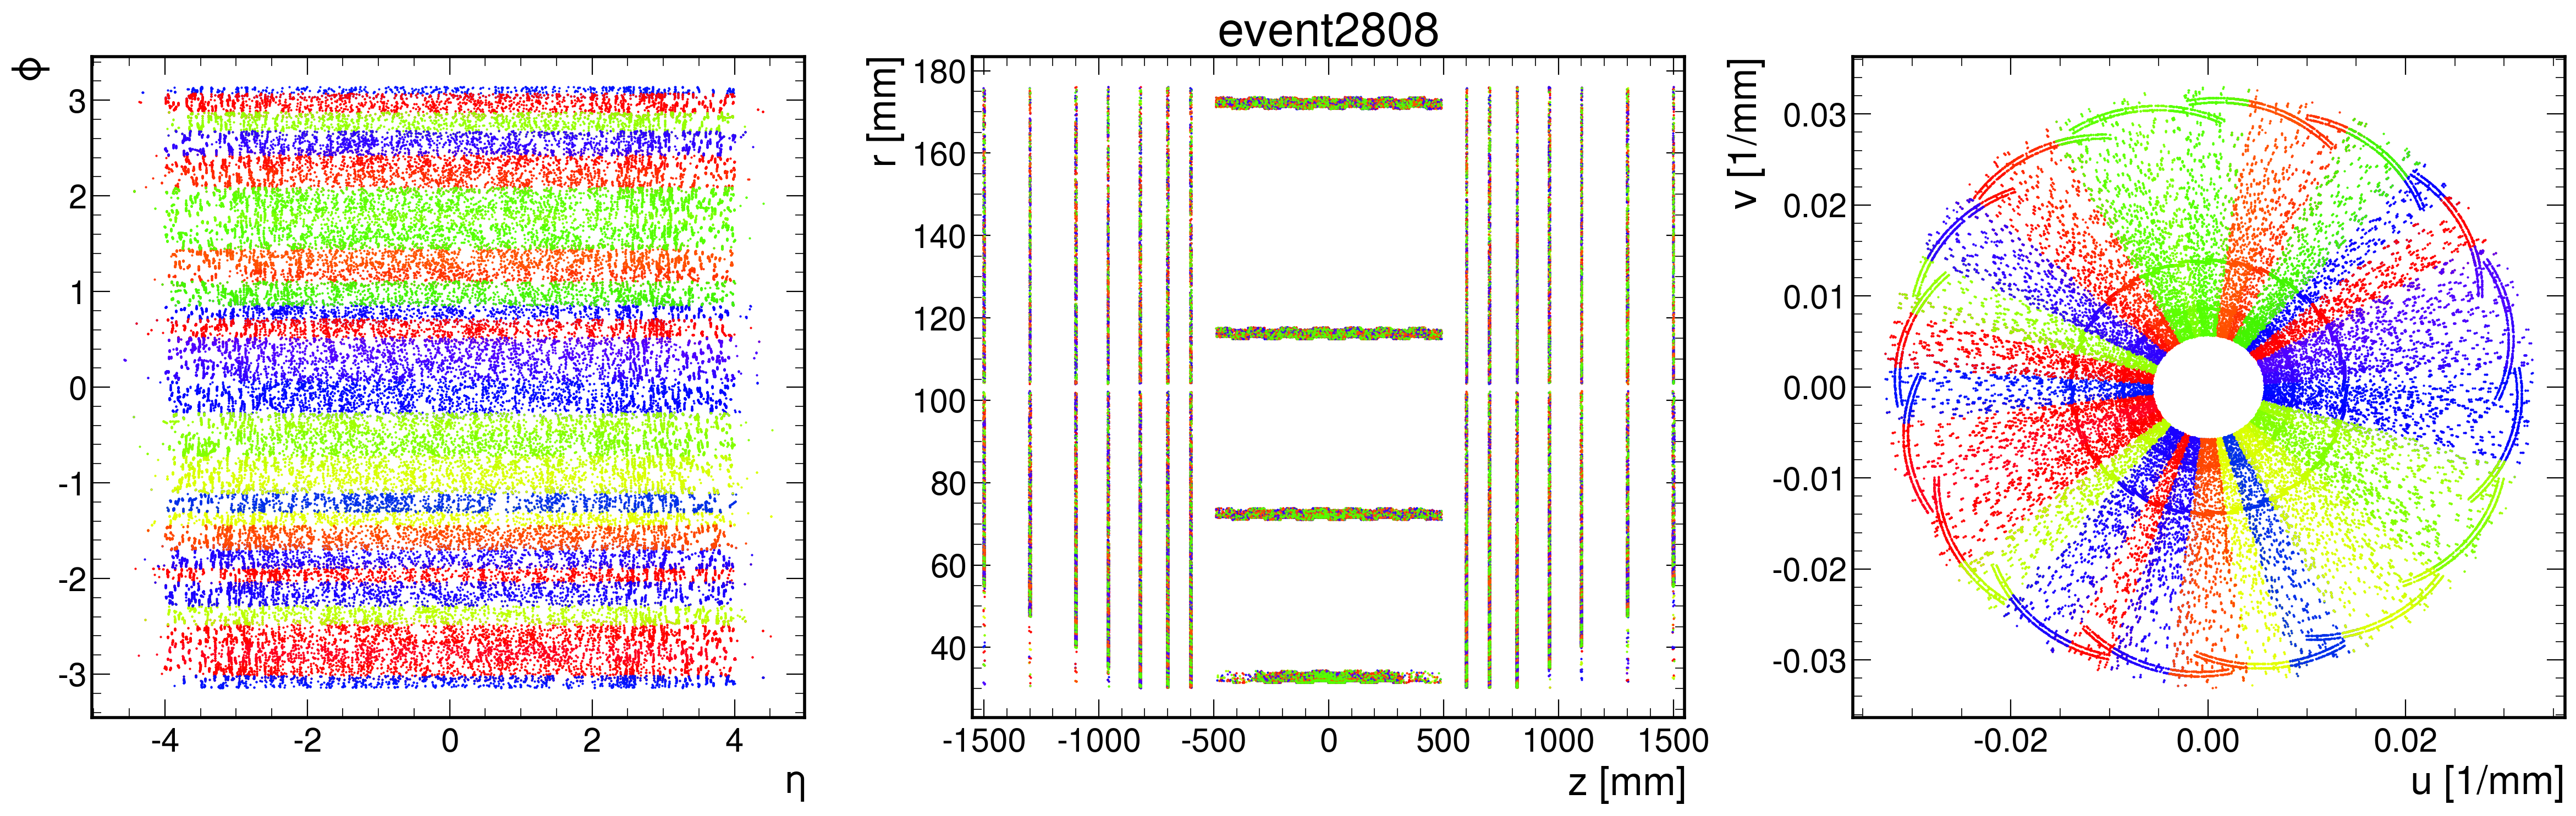

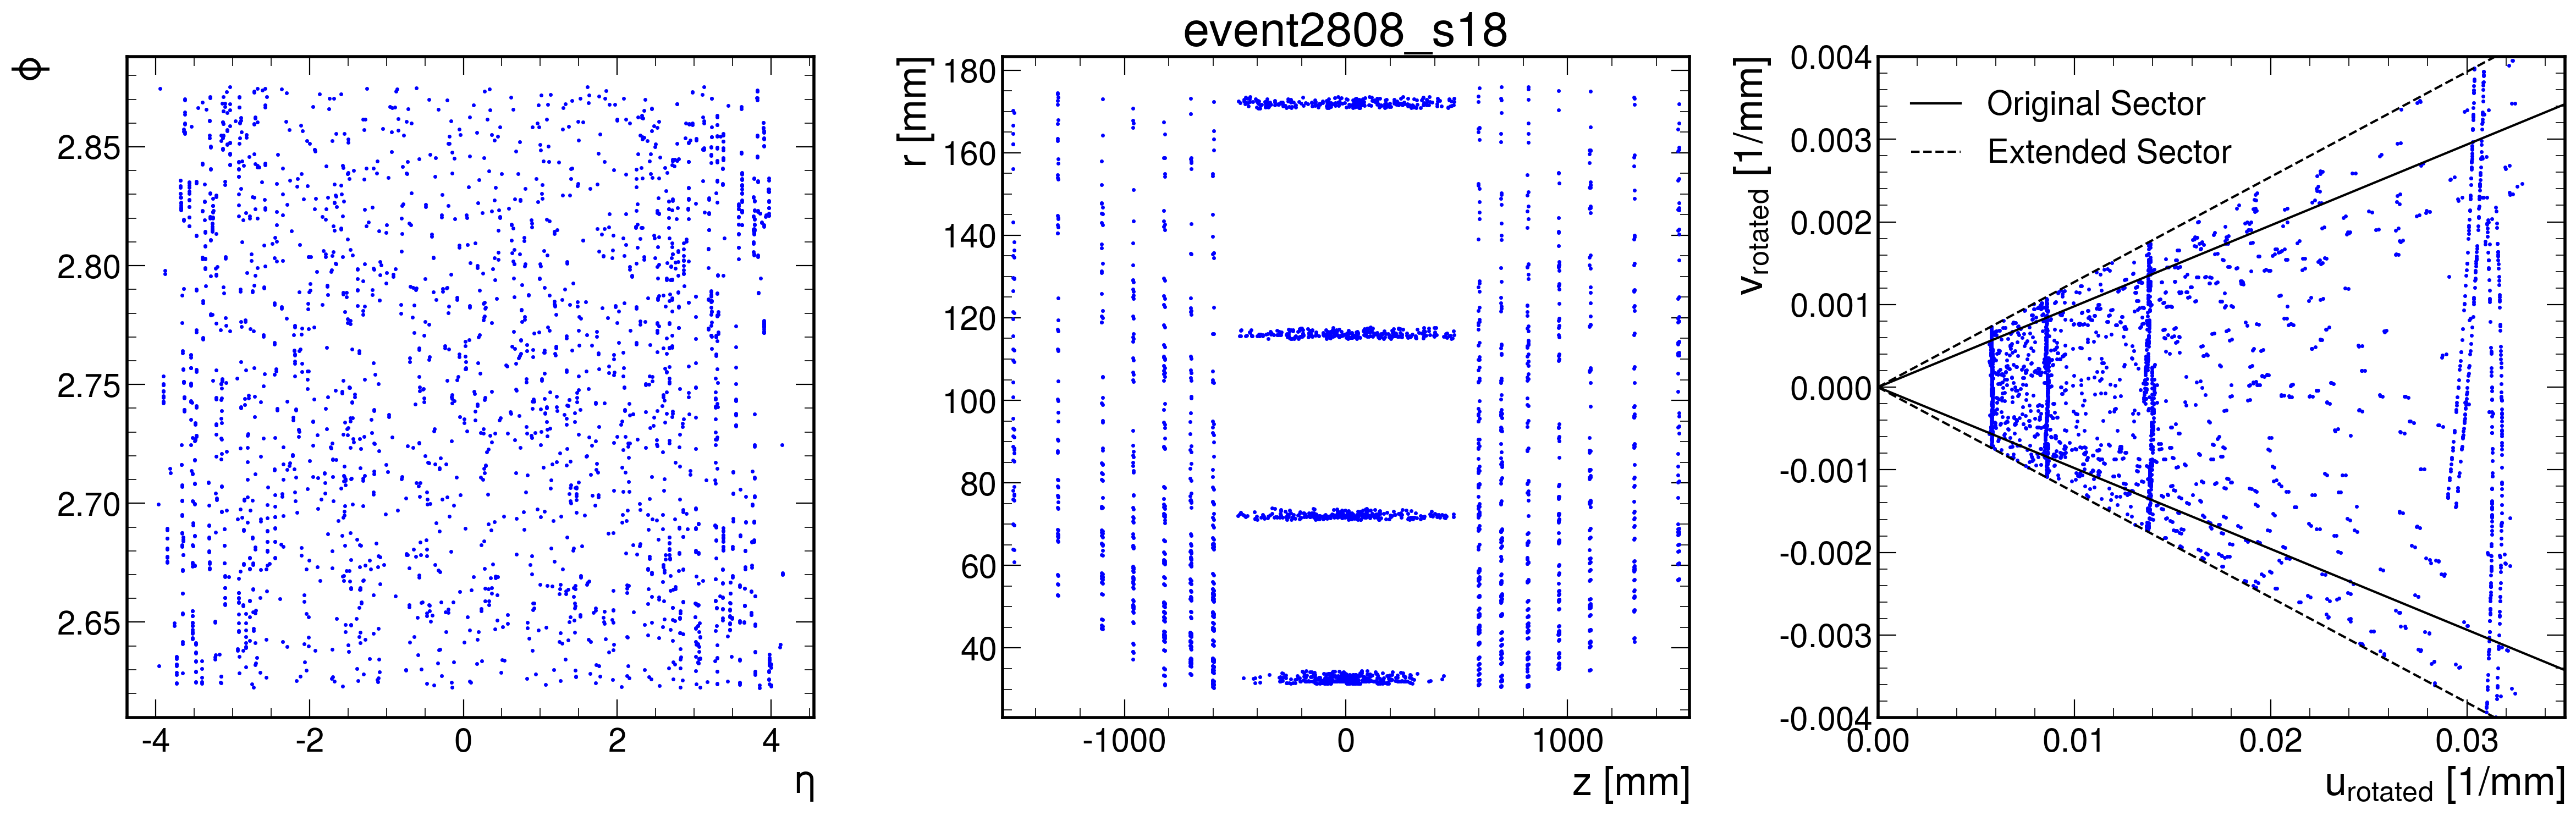

In [7]:
# visualize the sectors in each event and an overlapped ('extended') sector
pc_plotter = PointCloudPlotter(
    data_path / "point_clouds", n_sectors=pc_builder.n_sectors
)
pc_plotter.plot_ep_rv_uv_all_sectors(evtid)
pc_plotter.plot_ep_rv_uv_with_boundary(
    evtid, 18, pc_builder.sector_di, pc_builder.sector_ds
)

In [8]:
graph_builder = GraphBuilder(
    indir=data_path / "point_clouds",
    outdir=data_path / "graphs",
    redo=False,
    measurement_mode=False,
    phi_slope_max=0.0035,
    z0_max=200,
    dR_max=2.3,
    log_level=0,
)
graph_builder.process(start=0, stop=10)

[22:55:45 GraphBuilder] WARNING: Collecting data is deprecated. Please use graph_builder.load_data instead.
[22:55:45] INFO: Processing 10 graphs (out of 320 available).
